<a href="https://colab.research.google.com/github/ECastro08/talentoTech/blob/main/Titanic_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="dark")

In [ ]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [ ]:
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(bool)
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

<ipython-input-9-ae730d32c931>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="sex", data=titanic, palette=pal, kind="count")


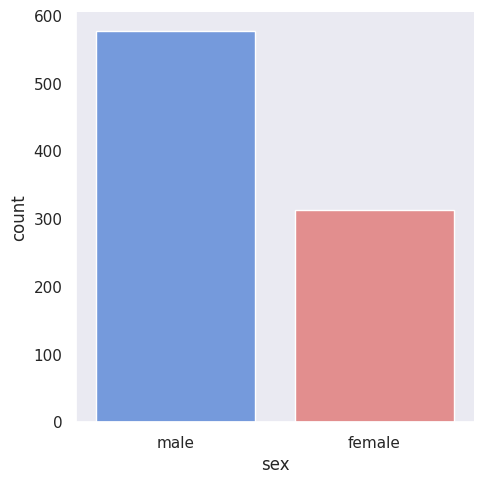

In [ ]:
sns.catplot(x="sex", data=titanic, palette=pal, kind="count")

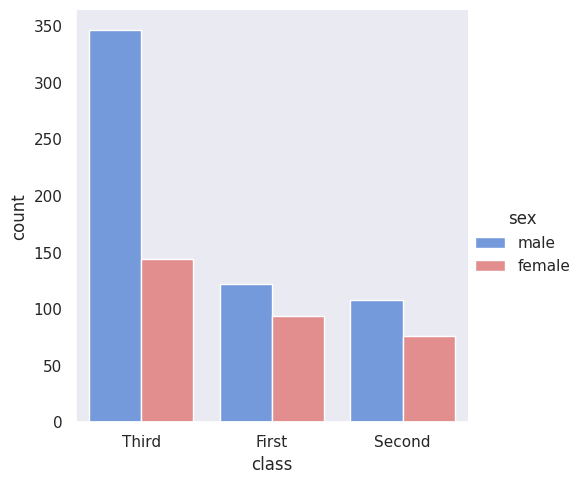

In [ ]:
sns.catplot(x="class", data=titanic, hue='sex', palette=pal, kind="count")

<ipython-input-11-d52f94515447>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="who", data=titanic, palette=pal, kind="count");


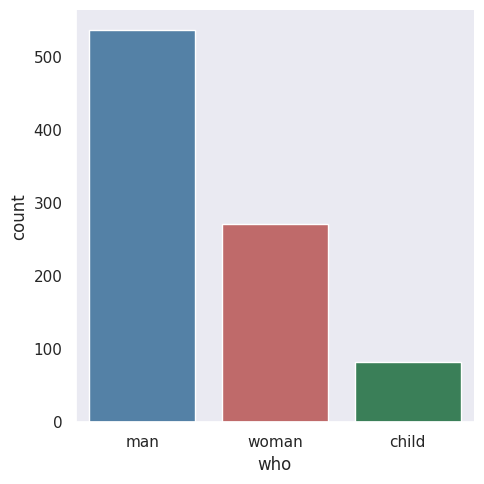

In [ ]:
sns.catplot(x="who", data=titanic, palette=pal, kind="count");

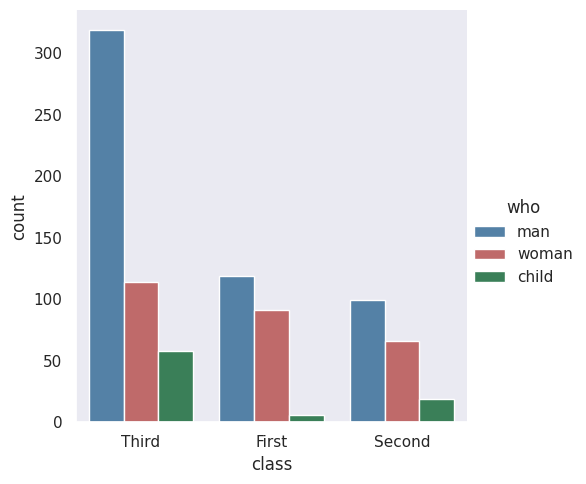

In [ ]:
sns.catplot(x="class", data=titanic, hue="who", palette=pal, kind= "count");

<ipython-input-13-397b0aa7d8e7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="adult_male", data=titanic, palette="Blues", kind="count");


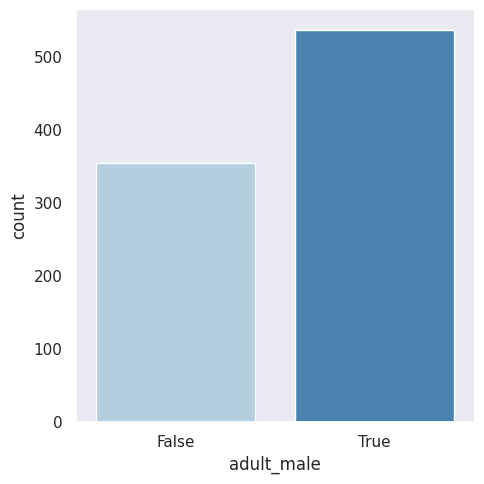

In [ ]:
sns.catplot(x="adult_male", data=titanic, palette="Blues", kind="count");

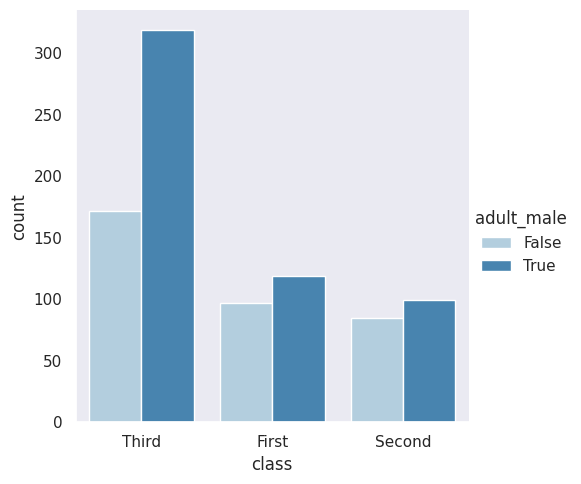

In [ ]:
sns.catplot(x="class", data=titanic, hue="adult_male", palette="Blues", kind="count");

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


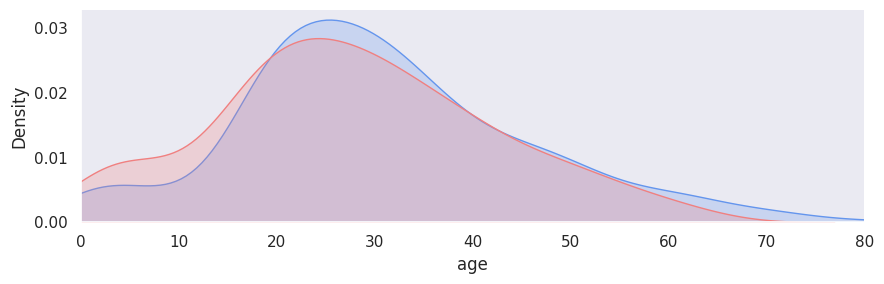

In [ ]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


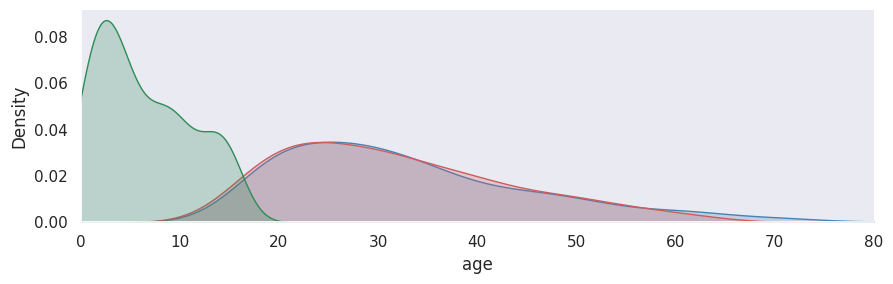

In [ ]:
fg = sns.FacetGrid(titanic, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

<ipython-input-17-179b861a672f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="class", data=titanic, palette="BuPu_d", kind="count");


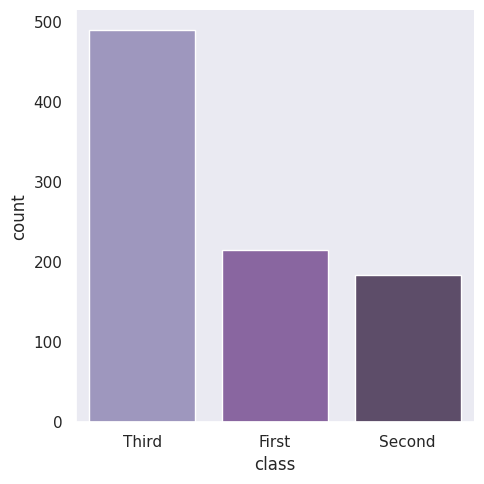

In [ ]:
sns.catplot(x="class", data=titanic, palette="BuPu_d", kind="count");

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


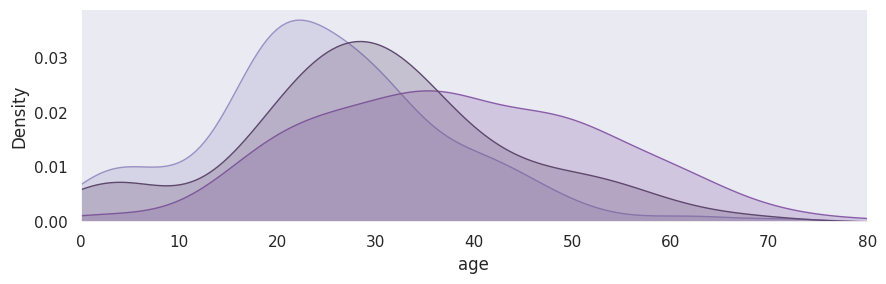

In [ ]:
fg = sns.FacetGrid(titanic, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

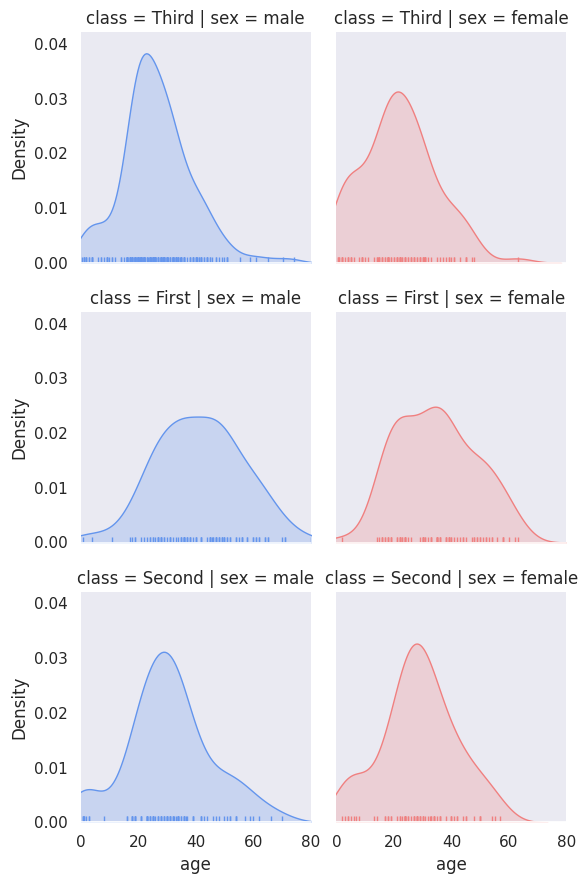

In [ ]:
fg = sns.FacetGrid(titanic, col="sex", row="class", hue="sex", height=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

<ipython-input-20-52e1cc51731d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="deck", data=titanic, palette="PuBu_d", kind='count');


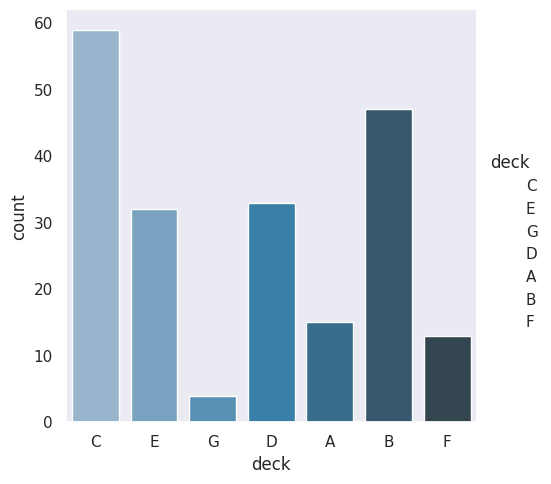

In [ ]:
sns.catplot(x="deck", data=titanic, palette="PuBu_d", kind='count');

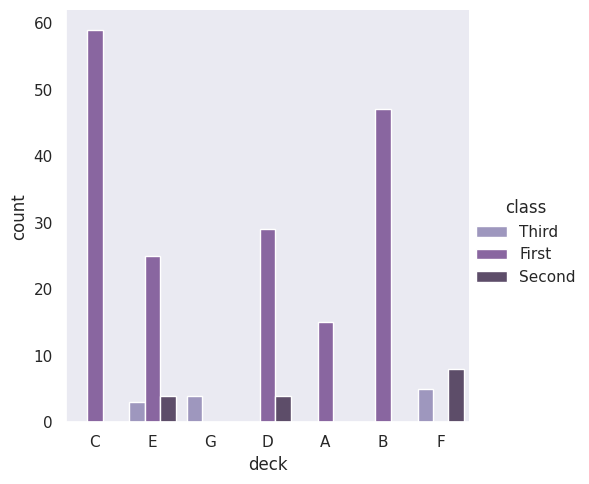

In [ ]:
sns.catplot(x="deck", hue="class", data=titanic, palette="BuPu_d", kind='count');

In [ ]:
from seaborn import linearmodels
reload(linearmodels)
reload(sns)
sns.set(style="nogrid")

ImportError: cannot import name 'linearmodels' from 'seaborn' (/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py)

In [ ]:
sns.catplot("class", "fare", data=titanic, palette="BuPu_d");

TypeError: catplot() got multiple values for argument 'data'

In [ ]:
sns.violinplot(titanic["fare"], titanic["class"], color="BuPu_d").set_ylim(0, 600)
sns.despine(left=True);

In [ ]:
titanic["fare_winsor"] = titanic.fare.map(lambda f: min(f, 200))

In [ ]:
sns.violinplot(titanic["fare_winsor"], titanic["class"], color="BuPu_d").set_ylim(0, 250)
sns.despine(left=True);

In [ ]:
sns.factorplot("deck", "fare", data=titanic, palette="PuBu_d");

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [ ]:
sns.violinplot(titanic["fare_winsor"], titanic["deck"], color="PuBu_d")
sns.despine(left=True);

In [ ]:
sns.factorplot("deck", "fare", data=titanic, palette="PuBu_d", estimator=np.median);

In [ ]:
sns.regplot("age", "fare", data=titanic, robust=True, ci=None, color="seagreen")
sns.despine();

In [ ]:
sns.factorplot("class", data=titanic, hue="embark_town", palette="Set2");

In [ ]:
sns.factorplot("class", data=titanic, hue="parch", palette="BuGn");

In [ ]:
sns.factorplot("class", data=titanic, hue="sibsp", palette="YlGn");

In [ ]:
sns.factorplot("alone", data=titanic, palette="Greens");

In [ ]:
sns.factorplot("alive", data=titanic, palette="OrRd_d");

In [ ]:
sns.factorplot("class", "survived", data=titanic).set(ylim=(0, 1))

In [ ]:
sns.factorplot("class", "survived", data=titanic, hue="sex", palette=pal).set(ylim=(0, 1));

In [ ]:
fg = sns.factorplot("class", "survived", data=titanic, hue="who", col="who", palette=pal, aspect=.4)
fg.set(ylim=(0, 1))
fg.despine(left=True)

In [ ]:
sns.factorplot("class", "survived", data=titanic, hue="adult_male", palette="Blues").set(ylim=(0, 1))

In [ ]:
fg = sns.factorplot("adult_male", "survived", data=titanic, col="class", hue="class",
                    aspect=.33, palette="BuPu_d")
fg.set(ylim=(0, 1))
fg.despine(left=True);

In [ ]:
sns.lmplot("age", "survived", titanic, logistic=True, y_jitter=.05);

In [ ]:
sns.lmplot("age", "survived", titanic, logistic=True, x_bins=4, truncate=True);

In [ ]:
age_bins = [15, 30, 45, 60]
sns.lmplot("age", "survived", titanic, hue="sex",
           palette=pal, x_bins=age_bins, logistic=True).set(xlim=(0, 80));

In [ ]:
sns.lmplot("age", "survived", titanic, hue="class",
           palette="BuPu_d", x_bins=age_bins, logistic=True).set(xlim=(0, 80));

In [ ]:
sns.lmplot("age", "survived", titanic, col="class", hue="class",
           palette="BuPu_d", x_bins=4, logistic=True, size=3).set(xlim=(0, 80));

In [ ]:
sns.lmplot("fare_winsor", "survived", titanic, x_bins=4, logistic=True, truncate=True);

In [ ]:
sns.factorplot("deck", "survived", data=titanic, palette="PuBu_d", join=False);

In [ ]:
sns.factorplot("deck", "survived", data=titanic, col="class", size=3, palette="PuBu_d", join=False);

In [ ]:
sns.lmplot("parch", "survived", titanic, x_estimator=np.mean, logistic=True);

In [ ]:
sns.lmplot("parch", "survived", titanic, hue="sex", x_estimator=np.mean, logistic=True, palette=pal);

In [ ]:
sns.lmplot("sibsp", "survived", titanic, x_estimator=np.mean, logistic=True);

In [ ]:
sns.factorplot("alone", "survived", data=titanic).set(ylim=(0, 1));

In [ ]:
fg = sns.factorplot("alone", "survived", data=titanic, col="class", hue="class",
                    aspect=.33, palette="BuPu_d")
fg.set(ylim=(0, 1))
fg.despine(left=True);

In [ ]:
sns.factorplot("class", "survived", data=titanic, hue="alone", palette="Greens").set(ylim=(0, 1));

In [ ]:
sns.factorplot("alone", "survived", data=titanic, hue="sex", palette=pal).set(ylim=(0, 1));